$\textbf{Exponentes de Lyapunov}$

Resolviendo

$\dot x= -y-z$

$\dot y= x+0.15y$

$\dot z= 0.2+z(x-10) $

y 

$\dot x= 16(y-x)$

$\dot y= x(45.92-z) - y$

$\dot z= xy-4z$

Ambos con condiciones iniciales $x_0=0.2$, $y_0=0.3$ y $z_0=0.5$. 

Respectivamente tiene $\lambda=0.09$ y $\lambda=1.5$.

In [1]:
#librerias a usar
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits import mplot3d
from scipy.integrate import odeint
from matplotlib import cm

$\textbf{Rössler}$

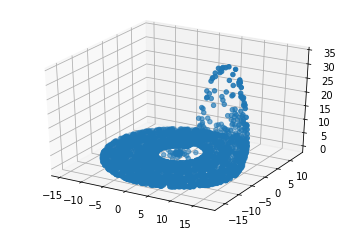

In [2]:
CI=[0.2,0.3,0.5]
T=np.linspace(0,3000,3000)

def rossler(a,t):
    return [-a[1]-a[2],a[0]+0.15*a[1],0.2+a[2]*(a[0]-10)]



solr = odeint(rossler,CI,T)
xr=solr[:,0]
yr=solr[:,1]
zr=solr[:,2]


fig = plt.figure()
ax1 = fig.add_subplot(111,projection='3d')
ax1.scatter(xr,yr, zr)
plt.show()

In [3]:
def dis(a,b,a1,b1): #definicion de la distancia euclidia 
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2 + (a[2]-b[2])**2 + (a1[0]-b1[0])**2 + (a1[1]-b1[1])**2 + (a1[2] - b1[2])**2)

In [4]:
dr=[]

CI2=[0.20+0.0000001,0.3+0.0000001,0.5+0.0000001]

for i in range(0,len(T)-5,5):
    solr2 = odeint(rossler,CI2,[T[i],T[i+1],T[i+2],T[i+3],T[i+4],T[i+5]])
    xr2=solr2[:,0]
    yr2=solr2[:,1]
    zr2=solr2[:,2]
    
    if i==0:
        dr.append(dis([xr[0],yr[0],zr[0]],[CI2[0],CI2[1],CI2[2]],rossler([xr[0],yr[0],zr[0]],T),rossler([CI2[0],CI2[1],CI2[2]],T)))

    
    if i % 5==0 and i!=0:

        
        dr.append(dis([xr[i],yr[i],zr[i]],[xr2[-1],yr2[-1],zr2[-1]],rossler([xr[i],yr[i],zr[i]],T),rossler([xr2[-1],yr2[-1],zr2[-1]],T)))
        CI2=[xr[i]+(dr[0]/dr[-1])*(xr2[-1]-xr[i]),yr[i]+(dr[0]/dr[-1])*(yr2[-1]-yr[i]),zr[i]+(dr[0]/dr[-1])*(zr2[-1]-zr[i])]
        
kr=[]
for i in range(1,len(dr)):
    kr.append(np.log(abs(dr[i]/dr[0])))
lambdar=np.mean(kr)/5
print(lambdar)

0.09191672057930365


$\textbf{Lorenz}$

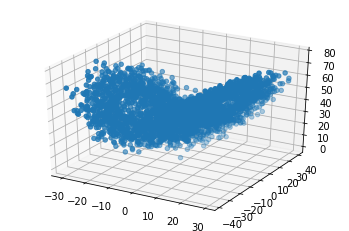

In [5]:
def lorenz(a,t):
    return [16*(a[1]-a[0]),a[0]*(45.92-a[2])-a[1],a[0]*a[1]-4*a[2]]

soll = odeint(lorenz,CI,T)
xl=soll[:,0]
yl=soll[:,1]
zl=soll[:,2]


fig = plt.figure()
ax1 = fig.add_subplot(111,projection='3d')
ax1.scatter(xl,yl, zl)
plt.show()

In [6]:
dl=[]

CI2=[0.20+0.0000001,0.3+0.0000001,0.5+0.0000001]

for i in range(0,len(T)-5,5):
    soll2 = odeint(lorenz,CI2,[T[i],T[i+1],T[i+2],T[i+3],T[i+4],T[i+5]])
    xl2=soll2[:,0]
    yl2=soll2[:,1]
    zl2=soll2[:,2]
    
    if i==0:
        dl.append(dis([xl[0],yl[0],zl[0]],[CI2[0],CI2[1],CI2[2]],lorenz([xl[0],yl[0],zl[0]],T),lorenz([CI2[0],CI2[1],CI2[2]],T)))

    
    if i % 5==0 and i!=0:

        
        dl.append(dis([xl[i],yl[i],zl[i]],[xl2[-1],yl2[-1],zl2[-1]],lorenz([xl[i],yl[i],zl[i]],T),lorenz([xl2[-1],yl2[-1],zl2[-1]],T)))
        CI2=[xl[i]+(dl[0]/dl[-1])*(xl2[-1]-xl[i]),yl[i]+(dl[0]/dl[-1])*(yl2[-1]-yl[i]),zl[i]+(dl[0]/dl[-1])*(zl2[-1]-zl[i])]
        
kl=[]
for i in range(1,len(dl)):
    kl.append(np.log(abs(dl[i]/dl[0])))
lambdal=np.mean(kl)/5
print(lambdal)

1.7924207878928962


Vemos que para Rössler el resultado es cercano al esperado pero en Lorenz es un numero cercano no es lo suficiente para decir que lo hecho converge a lo esperado.

Ahora veremos que pasa con los errores relativos.

In [7]:
abs((lambdar-0.09)/0.09)*100

2.129689532559619

In [8]:
abs((lambdal-1.5)/1.5)*100

19.494719192859744

Del anterior procedimiento vemos como el método depende del sistema a solucionar ya que para Rössler obtenemos un error del 2.1% y para Lorenz obtenemos un error del 19.5%.

En el artículo con 7000 iteraciones más pero con un tiempo 1000 veces menor hallaron un valores más cercanos que los hallados aquí, aun así el valor hallad es aceptado para Rössler por el pequeño valor de error relativo hallado pero en Lorenz sale del aceptado(menor al 10%).

Sabiendo que $\lambda$ depende del numero de iteraciones y que lo hecho se itero muchas menos veces que las vistas en el articulo y por la falta de una buena maquina no se pudo hacer a grandes iteraciones.

Del taller se dejo: "Reproduce the graph shown in the section Exponential Divergence of Nearby Trajectories and contrast the average time in which predictability is lost with the result of the Lyapunov exponent calculated by you. It would be better if you learn to make animations with matplotlib (or the software you prefer the most)"

<img src="spread_in_phase_space.png" alt="spread in phase space" width="400" />

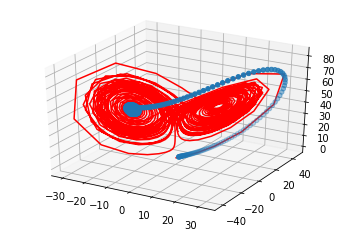

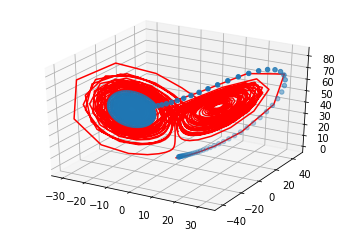

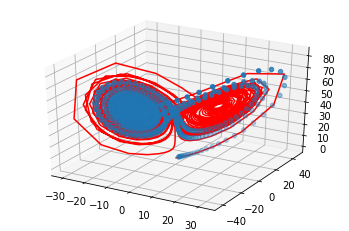

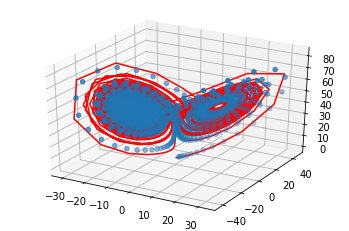

0.9670974867312898 9.245271638208852 -25.934347144195055 -213.37243298164205


In [9]:
t=np.linspace(0,30,1000)
t1=np.linspace(0,3,1000)
t2=np.linspace(0,6,1000)
t3=np.linspace(0,9,1000)
t4=np.linspace(0,15,1000)

sol = odeint(lorenz,CI,t)
xl=sol[:,0]
yl=sol[:,1]
zl=sol[:,2]

CI2=[0.20+np.random.random(),0.3+np.random.random(),0.5+np.random.random()]

soll1 = odeint(lorenz,CI2,t1)
soll2 = odeint(lorenz,CI2,t2)
soll3 = odeint(lorenz,CI2,t3)
soll4 = odeint(lorenz,CI2,t4)

x1=soll1[:,0]    
y1=soll1[:,1]    
z1=soll1[:,2]

x2=soll2[:,0]    
y2=soll2[:,1]    
z2=soll2[:,2]

x3=soll3[:,0]    
y3=soll3[:,1]    
z3=soll3[:,2]

x4=soll4[:,0]    
y4=soll4[:,1]    
z4=soll4[:,2]

fig = plt.figure()
ax1 = fig.add_subplot(111,projection='3d')
ax1.plot(xl,yl, zl,"r")
ax1.scatter(x1,y1, z1)
plt.show()

fig1 = plt.figure()
ax2= fig1.add_subplot(111,projection='3d')
ax2.plot(xl,yl, zl,"r")
ax2.scatter(x2,y2, z2)
plt.show()

fig2 = plt.figure()
ax3 = fig2.add_subplot(111,projection='3d')
ax3.plot(xl,yl, zl,"r")
ax3.scatter(x3,y3, z3)
plt.show()

fig3 = plt.figure()
ax4 = fig3.add_subplot(111,projection='3d')
ax4.plot(xl,yl, zl,"r")
ax4.scatter(x4,y4, z4)
plt.show()

d0=dis([xl[0],yl[0],zl[0]],[x1[0],y1[0],z1[0]],lorenz([xl[0],yl[0],zl[0]],t),lorenz([x1[0],y1[0],z1[0]],t1))

T1=[t[int(len(t)/10)],t[int(len(t)/5)],t[int(len(t)/3.33)],t[int(len(t)/2)]]
X=[xl[int(len(t)/10)],xl[int(len(t)/5)],xl[int(len(t)/3.33)],xl[int(len(t)/2)]]
Y=[yl[int(len(t)/10)],yl[int(len(t)/5)],yl[int(len(t)/3.33)],yl[int(len(t)/2)]]
Z=[zl[int(len(t)/10)],zl[int(len(t)/5)],zl[int(len(t)/3.33)],zl[int(len(t)/2)]]

dt1=d0*np.exp(lambdal*T[0])
dt2=d0*np.exp(lambdal*T[1])
dt3=d0*np.exp(lambdal*T[2])
dt4=d0*np.exp(lambdal*T[3])

d1=dis([X[0],Y[0],Z[0]],[x1[-1],y1[-1],z1[-1]],lorenz([X[0],Y[0],Z[0]],t),lorenz([x1[-1],y1[-1],z1[-1]],t1))
d2=dis([X[1],Y[1],Z[1]],[x2[-1],y2[-1],z2[-1]],lorenz([X[1],Y[1],Z[1]],t),lorenz([x2[-1],y2[-1],z2[-1]],t2))
d3=dis([X[2],Y[2],Z[2]],[x3[-1],y3[-1],z3[-1]],lorenz([X[2],Y[2],Z[2]],t),lorenz([x3[-1],y3[-1],z3[-1]],t3))
d4=dis([X[3],Y[3],Z[3]],[x4[-1],y4[-1],z4[-1]],lorenz([X[3],Y[3],Z[3]],t),lorenz([x4[-1],y4[-1],z4[-1]],t4))

print((d1-dt1)/dt1,(d2-dt2)/dt1,(d3-dt3)/dt1,(d4-dt4)/dt1)

En principio lo que esperamos y lo que obtenemos es demasiado diferente, aunque en el espacio de configuraciones vemos los datos muy cerca en el espacio de fase(donde calculamos la distancia) la separación es mayor a la esperada no es un gran problema ya que $\lambda$ mide la separación aleatoria en una frontera a nuestro punto y con el mismo punto pero otra separación no podemos asegurar que el comportamiento sea el mismo, ademas ya vimos que de lo esperado obtuvimos 19%  de error entre lambdas, no se usaron los parámetros de la imagen ya que se debería volver a calcular $\lambda$.

### $\textbf{HÉNON-HEILES}$

$\ddot x = -x-2xy$

$\ddot y = -y-x^2+y^2$


$\frac{dx}{dt} = v_x$

$\frac{dy}{dy} = v_y$

$\frac{dv_x}{dt} = -x-2xy$

$\frac{dv_y}{dt} = -y-x^2+y^2$

$E=\frac{1}{2}(\dot x^2 + \dot y^2) + \frac{1}{2}(x^2 + y^2) + yx^2 - \frac{1}{3}y^3 =  \frac{1}{2}(\dot x^2 + \dot y^2) + V(x,y)$

In [10]:
CI=[0,0.02] #Condiciones iniciales para la posición, 
#donde el primer termino es en x y el segundo en y

def HH(z,t): #Ecuaciones diferenciales a resolver
    x = z[0]
    y = z[1]

    dvx = -x-2*x*y
    dvy = -y-x**2+y**2
    
    return [dvx,dvy]

t=np.linspace(0,10000,10000) #Intervalo de tiempo que se integrara

sol = odeint(HH,CI,t) #Solucion a las ecuaciones diferenciales 
vx = sol[:,0]#La solución en x
vy = sol[:,1]#La solución en x

Observar que solo se resolvieron ecuaciones diferenciales de primer orden y por ende la solución hallada  son los valores de las velocidades y no las posiciones.

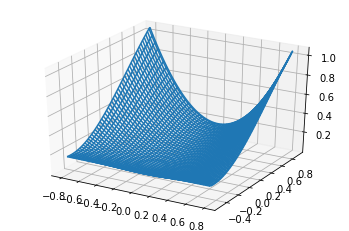

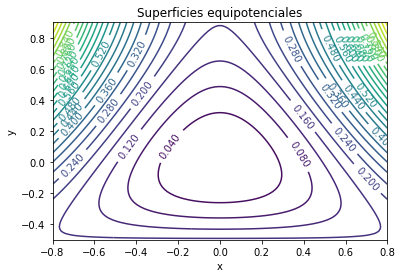

In [11]:
def V(X,Y):# Potencial
    return (1/2)*(X**2 + Y**2) + (X**2)*Y - (1/3)*Y**3

x1=np.linspace(-.8,.8,100) #Un rango de valores para x
y1=np.linspace(-.5,.9,100) #Un rango de valores para y

fig = plt.figure()# Se inicia la graficá
ax1 = fig.add_subplot(111,projection='3d')
X,Y = np.meshgrid(x1,y1)
ax1.plot_wireframe(X,Y,V(X,Y))
plt.show()
cs = plt.contour(X,Y,V(X,Y),levels=30)#De la superficie se tomaran un 
#corte el cual nos mostraran diferentes valores de x vs y 
#donde el potencial es constante
plt.clabel(cs, inline=1000, fontsize=10)
plt.title("Superficies equipotenciales")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


De las superficies equipotenciales observamos un triangulo con el valore $V=1.60$, después de este valor ninguna superficie se cierra mientras que para valores menores se observa como el triangulo va tomando una forma circular.

Del Goldstein sabemos que para $V = \frac{1}{6} \approx 1,67$ se tendrá un triangulo equilátero, los valores menores serán figuras cerradas y para mayores no cerradas, algo que cuadra con lo que se acabo de obtener.

Para $E<\frac{1}{6}$ se tiene que  $V(x,y)\leq E$ y $\frac{1}{2}(\dot x^2 + \dot y^2)\leq E$ y de la primer desigualdad vemos que en un diagrama y vs x siempre se estará confinada a a un triangulo equilátero. 

Si $x=0$ y $\dot x= 0$ entonces $E=\frac{1}{2} \dot y^2 + \frac{1}{2}  y^2+ - \frac{1}{3}y^3$

Ahora se gratificara las secciones de Poncare para algunos valores de E.

In [12]:
E=np.array([1/6,1/8,1/12,1/24,1e-2])

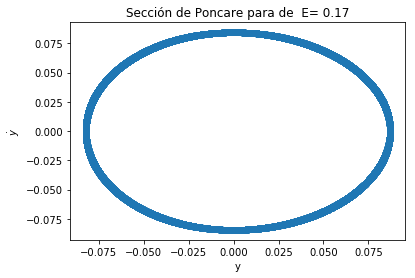

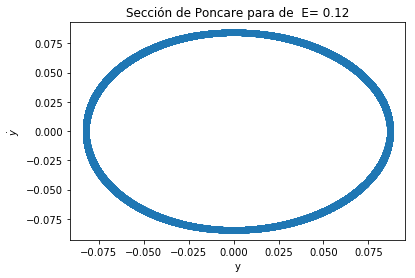

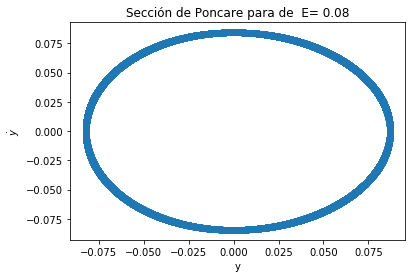

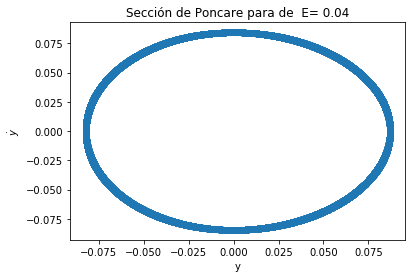

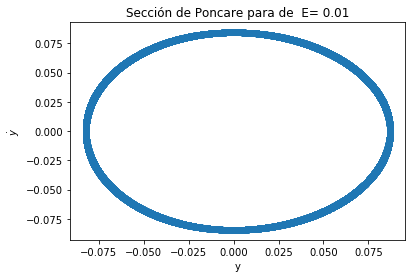

In [13]:
def HH1(z,t): #Ecuaciones diferenciales a resolver
    vy = z[1]
    dvy = -z[0]+z[0]**2
    
    return [vy,dvy]
for i in range (len(E)):

    C1=[-0.08,0.02]
    sol1 = odeint(HH1,C1,t)
    y=sol1[:,0]
    vy=sol1[:,1]
    plt.plot(y,vy,"o")
    plt.xlabel("y")
    plt.ylabel("$\dot y$")
    plt.title("Sección de Poncare para de  E=%5.2f"%E[i])
    plt.show()

En el caso $x=0$ y $\dot x = 0$ $\forall t$ observamos unos secciones de Poncare son la misma $\forall E$.

Ahora bajo las mismas condiciones pero  $\dot x \neq 0$ tenemos que $\dot x = \sqrt{(2E - \dot y_1^2 - \frac{2}{3}y_1^3)}$ , donde $y_1$ es la condición inicial podemos hallar las secciones de Poncare entre $y$ y $\dot y$.

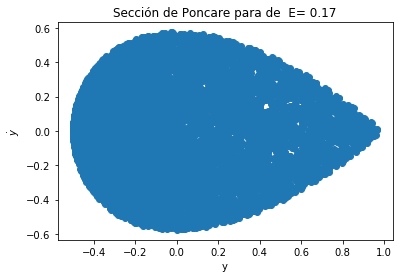

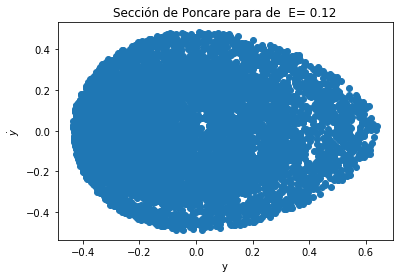

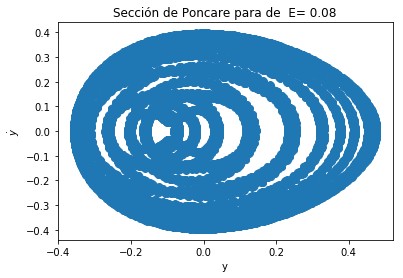

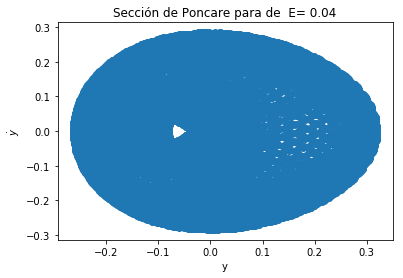

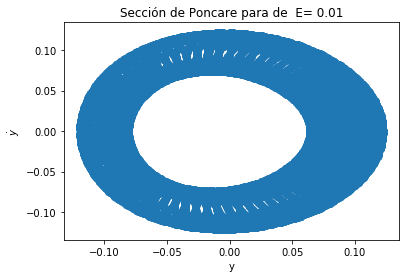

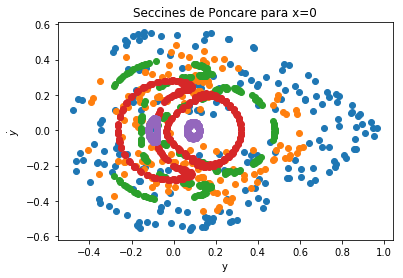

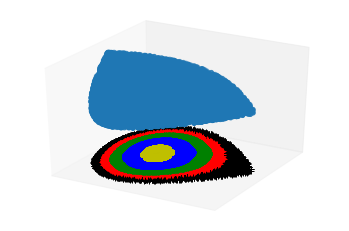

In [14]:
vxn=(2*E-0.02**2-0.08**2 - (2/3)*0.08**3)**0.5#Primer 
#valor de la velocidad en x
def HH(z,t): #Ecuaciones diferenciales a resolver
    vx = z[1]
    vy = z[3]

    dvx = -z[0]-2*z[0]*z[2]
    dvy = -z[2]-z[0]**2+z[2]**2
    
    return [vx,dvx,vy,dvy]
Y=[]
VY=[]
X=[]

Y1=[[],[],[],[],[]]
VY1=[[],[],[],[],[]]

for i in range (len(vxn)):

    C=[0,vxn[i],-0.08,0.02]
    sol = odeint(HH,C,t)
    x=sol[:,0]
    y=sol[:,2]
    vy=sol[:,3]    
    Y.append(y)
    VY.append(vy)
    X.append(x)
    for j in range (len(x)):
        if abs(x[j])<=10**-2:
            Y1[i].append(y[j])
            VY1[i].append(vy[j])
    plt.plot(y,vy,"o")
    plt.xlabel("y")
    plt.ylabel("$\dot y$")
    plt.title("Sección de Poncare para de  E=%5.2f"%E[i])
    """
    plt.plot(y,-vy,"o")
    plt.plot(-y,vy,"o")
    """
    
    plt.show()

plt.plot(Y1[0],VY1[0],"o")
plt.plot(Y1[1],VY1[1],"o")
plt.plot(Y1[2],VY1[2],"o")
plt.plot(Y1[3],VY1[3],"o")
plt.plot(Y1[4],VY1[4],"o")
plt.xlabel("y")
plt.ylabel("$\dot y$")
plt.title("Seccines de Poncare para x=0")

plt.show()


fig = plt.figure()
ax1 = fig.add_subplot(111,projection='3d')
ax1.scatter(Y,VY, X)
ax1.plot(Y[0], VY[0], 'k+', zdir='z', zs=-1.5)
ax1.plot(Y[1], VY[1], 'r+', zdir='z', zs=-1.5)
ax1.plot(Y[2], VY[2], 'g+', zdir='z', zs=-1.5)
ax1.plot(Y[3], VY[3], 'b+', zdir='z', zs=-1.5)
ax1.plot(Y[4], VY[4], 'y+', zdir='z', zs=-1.5)
ax1.w_zaxis.line.set_lw(0.)
ax1.set_zticks([])
ax1.w_xaxis.line.set_lw(0.)
ax1.set_xticks([])
ax1.w_yaxis.line.set_lw(0.)
ax1.set_yticks([])



plt.show()

Bajo estas condiciones se hallan resultados parecidos a los dados en el libro, las dos lineas comentadas en la graficación se usaron para observar que la gráfica no cambia bajo la sustitución $\dot y \rightarrow -\dot y$ pero si cuando se hace $y \rightarrow -y$.

En el caso $x=0$ observamos como los datos de $\dot y$ vs $y$ se parecen a lo observado en el libro.

Cuando se aumenta el tiempo de integración se observa como los agujeros en estas gráficas se van llenando.

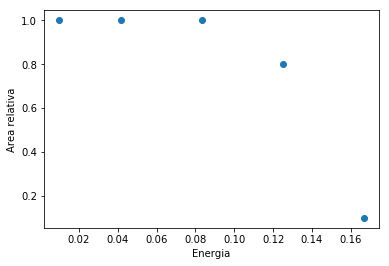

In [15]:
plt.plot(E,[.1,.8,1,1,1],"o")
plt.xlabel("Energia")
plt.ylabel("Area relativa")
plt.show()

La figura anterior es una aproximación, en el libro se explica la forma en la cual se obtienen estos valores(los de área relativa o región no caótica) pero con los valores obtenidos no veo la forma de poder hacer eso y por eso se hizo este bosquejo.

Para valores de $E \sim 10^{-3}$ el diagrama $\dot y$ vs $y$ presenta órbitas elípticas brevemente perturbadas, si se gráfica x vs y a energía constante (algo que podemos hacer para este sistema) y ver las jerarquías de las islas, con la ayuda de otro sistema caótico , $x_{n+1} = x_ncos\alpha - y_nsin\alpha + x_n^2sin\alpha $ y $y_{n+1} = y_ncos\alpha + x_nsin\alpha - x_n^2cos\alpha $.

Si $cos\alpha = 0.4$ e iterando.

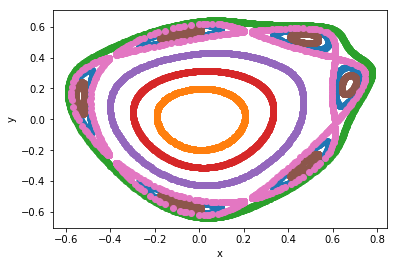

In [16]:
ca=0.4
sa=np.sin(np.arccos(0.4))

x=[-0.5]
y=[0.15]
x1=[0.15]
y1=[0.15]
x2=[-0.4]
y2=[-0.3]
x3=[-0.2]
y3=[-0.2]
x4=[0.25]
y4=[0.4]
x5=[-0.55]
y5=[0.1]
x6=[0.354]
y6=[-0.46]

def xn(a,b):
    return a*ca-b*sa+(a**2) * sa
def yn(a,b):
    return a*sa+b*ca-(a**2) * ca

for i in range (1000):
        
    x.append(xn(x[i],y[i]))
    y.append(yn(x[i],y[i]))
    x1.append(xn(x1[i],y1[i]))
    y1.append(yn(x1[i],y1[i]))
    x2.append(xn(x2[i],y2[i]))
    y2.append(yn(x2[i],y2[i]))
    x3.append(xn(x3[i],y3[i]))
    y3.append(yn(x3[i],y3[i]))
    x4.append(xn(x4[i],y4[i]))
    y4.append(yn(x4[i],y4[i]))
    x5.append(xn(x5[i],y5[i]))
    y5.append(yn(x5[i],y5[i]))
    x6.append(xn(x6[i],y6[i]))
    y6.append(yn(x6[i],y6[i]))
    


plt.plot(x,y,"o")
plt.plot(x1,y1,"o")
plt.plot(x2,y2,"o")
plt.plot(x3,y3,"o")
plt.plot(x4,y4,"o")
plt.plot(x5,y5,"o")
plt.plot(x6,y6,"o")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Si bien la gráfica no coincide con la del libro no es algo que deba preocuparme ya que no se tomaron condiciones iniciales iguales, solo que $cos\alpha = 0.4$  y que $-1<x<1$ y $-1<y<1$, manipulando varias veces las condiciones iniciales observamos como el sistema tiene un comportamiento similar pero no exactamente el mismo que se busca,jugando con $\alpha$ se observaron comportamientos muy diferentes y como en algunos divergen fácilmente. 

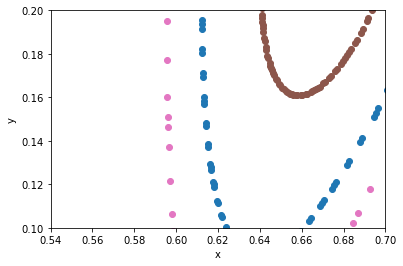

In [17]:
plt.plot(x,y,"o")
plt.plot(x1,y1,"o")
plt.plot(x2,y2,"o")
plt.plot(x3,y3,"o")
plt.plot(x4,y4,"o")
plt.plot(x5,y5,"o")
plt.plot(x6,y6,"o")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(.54,.7)
plt.ylim(.1,.2)
plt.show()